In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
dataset = pd.read_csv('./data/pima-indians-diabetes.csv', header=None)
print('data loaded')

data loaded


In [2]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
description = dataset.describe()

In [4]:
description

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
for i in range(5,0,-1):
    dataset = dataset[dataset.iloc[:,i] != 0]
dataset.describe()

,0,1,2,3,4,5,6,7,8
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [7]:
dataset.rename(columns={0:'Pregnancies',1:'Glucose',2:'BloodPressure', 
                        3:'SkinThickness', 4:'Insulin',5:'BMI',
                        6:'DiabetesPedigreeFunction',7:'Age',8:'Outcome'}, inplace=True)

In [8]:
q1 = np.quantile(dataset.Insulin,0.25)
q3 = np.quantile(dataset.Insulin, 0.75)
insulin_aberrant = dataset.loc[dataset.Insulin > q3+1.5*(q3-q1),:]

In [9]:
insulin_aberrant.Outcome.value_counts()

1    15
0    10
Name: Outcome, dtype: int64

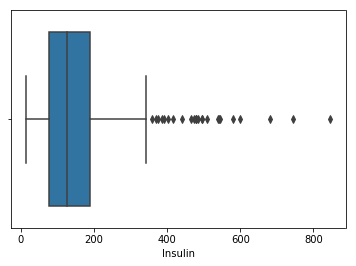

In [10]:
import seaborn as sns
%matplotlib inline 
sns.boxplot(dataset.Insulin)

In [11]:
import scipy.stats as ss
X = dataset.iloc[:,:-1]
X['insuline_aberrant'] = X.Insulin > 360

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,insuline_aberrant
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,False
6,3,78,50,32,88,31.0,0.248,26,False
8,2,197,70,45,543,30.5,0.158,53,True
13,1,189,60,23,846,30.1,0.398,59,True


In [13]:
test_result = []
for i in range(7):
    for j in range(i+1,8):
        test = ss.ttest_ind(X.iloc[:,i],X.iloc[:,j])
        test_result.append([X.columns[i],X.columns[j],np.round(test.pvalue,100)])

In [14]:
test_result

[['Pregnancies', 'Glucose', 0.0],
 ['Pregnancies', 'BloodPressure', 0.0],
 ['Pregnancies', 'SkinThickness', 0.0],
 ['Pregnancies', 'Insulin', 0.0],
 ['Pregnancies', 'BMI', 0.0],
 ['Pregnancies', 'DiabetesPedigreeFunction', 1.5150486355681569e-55],
 ['Pregnancies', 'Age', 0.0],
 ['Glucose', 'BloodPressure', 0.0],
 ['Glucose', 'SkinThickness', 0.0],
 ['Glucose', 'Insulin', 9.314347797149482e-08],
 ['Glucose', 'BMI', 0.0],
 ['Glucose', 'DiabetesPedigreeFunction', 0.0],
 ['Glucose', 'Age', 0.0],
 ['BloodPressure', 'SkinThickness', 0.0],
 ['BloodPressure', 'Insulin', 1.247189726766044e-40],
 ['BloodPressure', 'BMI', 0.0],
 ['BloodPressure', 'DiabetesPedigreeFunction', 0.0],
 ['BloodPressure', 'Age', 0.0],
 ['SkinThickness', 'Insulin', 2.394527471199125e-78],
 ['SkinThickness', 'BMI', 1.103926415575936e-09],
 ['SkinThickness', 'DiabetesPedigreeFunction', 0.0],
 ['SkinThickness', 'Age', 0.02040562078074461],
 ['Insulin', 'BMI', 8.560440687697287e-75],
 ['Insulin', 'DiabetesPedigreeFunction', 

In [15]:
test

Ttest_indResult(statistic=-58.85745505059363, pvalue=1.566524150875076e-289)

In [16]:
#X_array = np.array(X)
test_corr = []
for i in range(8):
    for j in range(i,8):
        corr = np.corrcoef(X.iloc[:,i],X.iloc[:,j])
        test_corr.append([i,j,corr[0,1]])

In [17]:
test_corr

[[0, 0, 0.9999999999999999],
 [0, 1, 0.19829104308052087],
 [0, 2, 0.21335477472245085],
 [0, 3, 0.0932093974054524],
 [0, 4, 0.07898362510990971],
 [0, 5, -0.025347276056046256],
 [0, 6, 0.007562116438437554],
 [0, 7, 0.6796084703853134],
 [1, 1, 1.0],
 [1, 2, 0.21002657364775343],
 [1, 3, 0.19885581885227427],
 [1, 4, 0.5812230123542533],
 [1, 5, 0.20951591881842818],
 [1, 6, 0.1401801799076905],
 [1, 7, 0.34364149991026494],
 [2, 2, 1.0],
 [2, 3, 0.23257118913532568],
 [2, 4, 0.09851150312787163],
 [2, 5, 0.30440336850359956],
 [2, 6, -0.01597110350582252],
 [2, 7, 0.3000389462787932],
 [3, 3, 1.0],
 [3, 4, 0.18219906133857003],
 [3, 5, 0.664354866692933],
 [3, 6, 0.16049852633674916],
 [3, 7, 0.16776114150160307],
 [4, 4, 1.0],
 [4, 5, 0.22639651774497568],
 [4, 6, 0.13590578113752144],
 [4, 7, 0.21708199090471678],
 [5, 5, 1.0],
 [5, 6, 0.15877104319825314],
 [5, 7, 0.06981379857867923],
 [6, 6, 1.0],
 [6, 7, 0.08502910583181746],
 [7, 7, 1.0]]

In [18]:
from sklearn.feature_selection import mutual_info_regression as mir        
test_ind = []
for i in range(8):
    for j in range(i,8):
        mir_res = mir(np.array(X)[:,i].reshape(-1,1),np.array(X)[:,j].reshape(-1,1))
        test_ind.append([X.columns[i],X.columns[j],mir_res[0]])

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [19]:
test_ind

[['Pregnancies', 'Pregnancies', 2.2720267267873955],
 ['Pregnancies', 'Glucose', 0.05558670415895506],
 ['Pregnancies', 'BloodPressure', 0.04272561950953735],
 ['Pregnancies', 'SkinThickness', 0.09095672728819881],
 ['Pregnancies', 'Insulin', 0.08051181303697019],
 ['Pregnancies', 'BMI', 0.040446525540807965],
 ['Pregnancies', 'DiabetesPedigreeFunction', 0.003875916991634032],
 ['Pregnancies', 'Age', 0.2858641196430689],
 ['Glucose', 'Glucose', 4.2783224287086465],
 ['Glucose', 'BloodPressure', 0.04441711824364836],
 ['Glucose', 'SkinThickness', 0.03627141003807699],
 ['Glucose', 'Insulin', 0.2432128777288427],
 ['Glucose', 'BMI', 0.06884430998578672],
 ['Glucose', 'DiabetesPedigreeFunction', 0.00760459327174523],
 ['Glucose', 'Age', 0.07526172734448844],
 ['BloodPressure', 'BloodPressure', 3.1372808039110405],
 ['BloodPressure', 'SkinThickness', 0.06156454497053243],
 ['BloodPressure', 'Insulin', 0.02984224800326718],
 ['BloodPressure', 'BMI', 0.05009628561499868],
 ['BloodPressure', 

In [20]:
'''3. separer dataset'''
X_y1 = dataset[dataset.iloc[:,-1] == 1]
X_y0 = dataset[dataset.iloc[:,-1] == 0]

In [21]:
X_y1.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1


In [22]:
X_y0.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
18,1,103,30,38,83,43.3,0.183,33,0
20,3,126,88,41,235,39.3,0.704,27,0
27,1,97,66,15,140,23.2,0.487,22,0
28,13,145,82,19,110,22.2,0.245,57,0


In [23]:
'''4. tester normalité'''
import scipy.stats as ss
import seaborn as sb
test_norm_y1 = []
for i in range(8) :
    norm = ss.normaltest(X_y1.iloc[:,i])
    test_norm_y1.append([X.columns[i],norm.pvalue])
    
test_norm_y0 = []
for i in range(8) :
    norm = ss.normaltest(X_y0.iloc[:,i])
    test_norm_y0.append([X.columns[i],norm.pvalue])

No handles with labels found to put in legend.


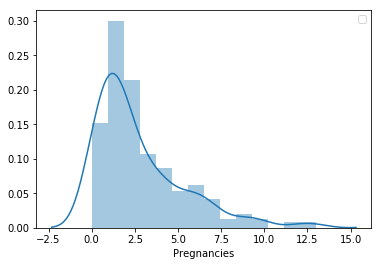

No handles with labels found to put in legend.


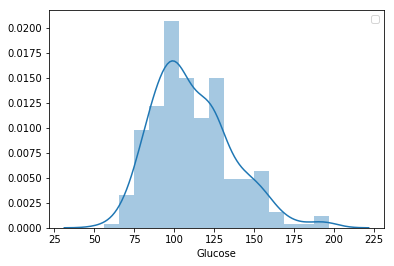

No handles with labels found to put in legend.


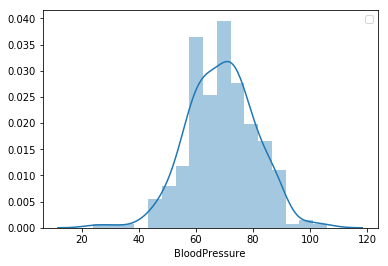

No handles with labels found to put in legend.


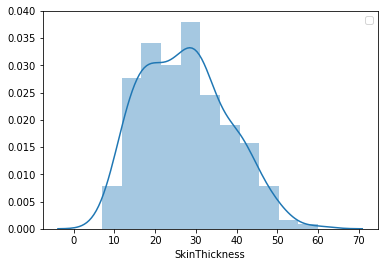

No handles with labels found to put in legend.


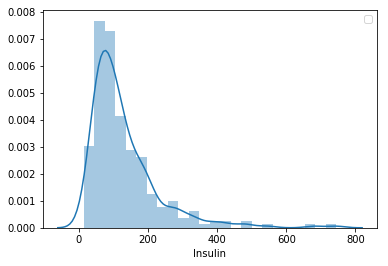

No handles with labels found to put in legend.


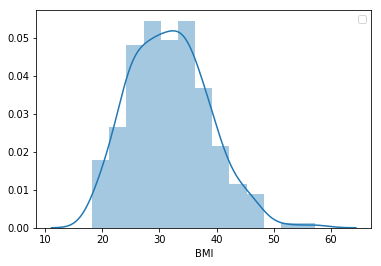

No handles with labels found to put in legend.


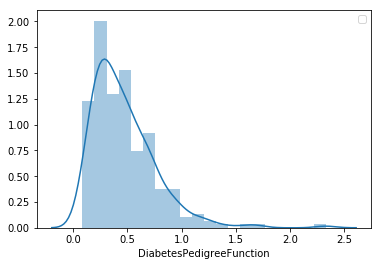

No handles with labels found to put in legend.


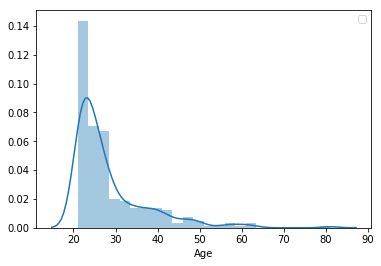

In [24]:
import matplotlib.pyplot as plt 
for i in range(0,8):
    sb.distplot(X_y0.iloc[:,i])
    plt.legend()
    plt.show()

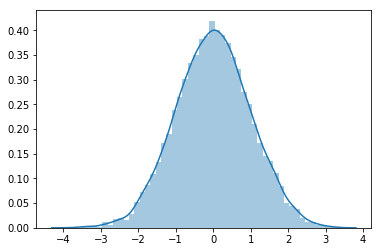

In [25]:
normal = np.random.normal(size = 10000)
ss.normaltest(normal)
sns.distplot(normal)

In [26]:
'''5. séparer en train test'''
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, dataset.iloc[:,-1], random_state = 42, test_size = 0.3)

In [27]:
from sklearn.preprocessing import KBinsDiscretizer
KB = KBinsDiscretizer(n_bins=10, encode = 'ordinal')
KB_fit = KB.fit(xtrain)
xtrain_cut = pd.DataFrame(KB_fit.transform(xtrain), columns = xtrain.columns, dtype = str)
xtest_cut = pd.DataFrame(KB_fit.transform(xtest),  columns = xtest.columns, dtype = str)
xtrain_cut = pd.get_dummies(xtrain_cut)
xtest_cut= pd.get_dummies(xtest_cut)

In [28]:
'''6. statistiques descriptives'''
desc = xtrain.describe()
desc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,3.229927,123.587591,70.248175,29.302920,160.562044,33.135036,0.520084,30.813869
std,3.150972,30.476220,12.036137,10.794086,121.067163,7.051122,0.346394,10.427757
min,0.000000,56.000000,24.000000,7.000000,14.000000,19.400000,0.085000,21.000000
25%,1.000000,100.000000,62.000000,21.000000,78.250000,28.500000,0.268000,23.000000
50%,2.000000,119.000000,70.000000,29.500000,130.000000,33.100000,0.457500,27.000000
75%,5.000000,144.000000,78.000000,36.750000,190.000000,37.100000,0.670000,35.000000
max,15.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [29]:
'''7. naive bayes'''
import sklearn.naive_bayes as nb
naivebayes = nb.GaussianNB()

In [30]:
'''8. entraînement du modèle'''
naivebayes_fit = naivebayes.fit(xtrain, ytrain)

'''9. score de performance'''
naivebayes_fit.score(xtrain,ytrain)
naivebayes_fit.score(xtest,ytest)

control = xtest.copy()
control['y'] = ytest
control['y_pred'] = naivebayes_fit.predict(xtest)

No handles with labels found to put in legend.


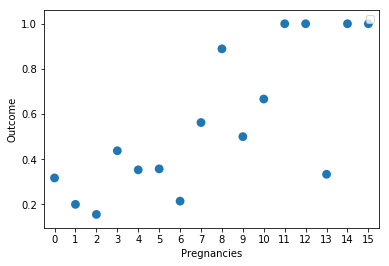

No handles with labels found to put in legend.


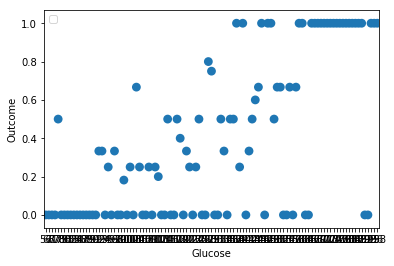

No handles with labels found to put in legend.


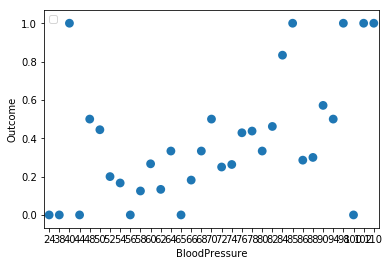

No handles with labels found to put in legend.


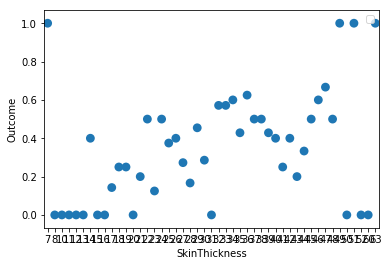

No handles with labels found to put in legend.


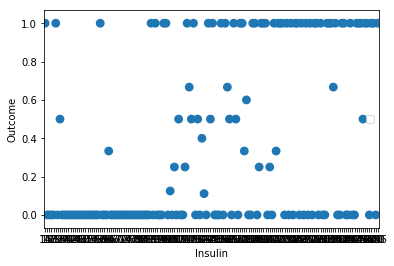

No handles with labels found to put in legend.


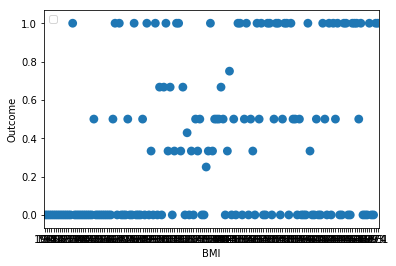

No handles with labels found to put in legend.


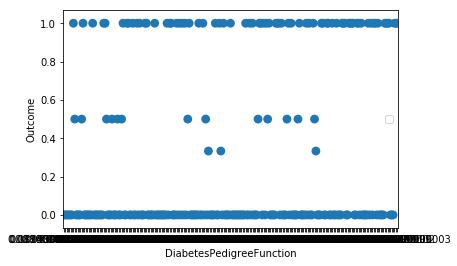

No handles with labels found to put in legend.


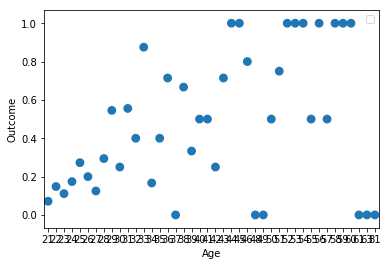

In [31]:
'''10. comment améliorer la performance?
            -->on peut créer de nouvelles variables'''
for i in range(0,8):
    sb.pointplot(x=xtrain.iloc[:,i],y=ytrain, join=False, ci=None)
    plt.legend()
    plt.show()

In [32]:
# bagging
from sklearn.ensemble import BaggingClassifier as BC
naivebayes = nb.GaussianNB()
modelB = BC(base_estimator = naivebayes, n_estimators = 1000, warm_start = True, bootstrap_features=True, max_samples=0.9)
modelB_fit = modelB.fit(xtrain,ytrain)

In [33]:
print("Accuracy du model sur le dataset de test {}% ".format(np.round(modelB_fit.score(xtest,ytest),5)*100))

Accuracy du model sur le dataset de test 73.729% 
